In [118]:
import pandas as pd
import numpy as np

In [119]:
pidex = pd.read_csv('{경로}/kospi_index.csv')
pidex = pidex.drop(['Unnamed: 0'], axis = 1)
print(pidex)

           종가       오픈       고가       저가  변동 %          날짜
0      520.95   503.31   521.34   500.97  3.24  2001-01-02
1      521.43   512.74   524.58   510.70  0.09  2001-01-03
2      558.02   551.53   567.16   550.91  7.02  2001-01-04
3      580.85   559.54   581.41   555.40  4.09  2001-01-05
4      586.65   573.72   587.91   572.48  1.00  2001-01-08
...       ...      ...      ...      ...   ...         ...
5289  2612.45  2616.99  2641.91  2602.01 -0.18  2022-05-26
5290  2638.05  2640.75  2644.71  2631.49  0.98  2022-05-27
5291  2669.66  2662.31  2672.74  2654.18  1.20  2022-05-30
5292  2685.90  2666.88  2685.90  2654.32  0.61  2022-05-31
5293  2658.99  2670.74  2674.00  2653.59 -1.00  2022-06-02

[5294 rows x 6 columns]


In [120]:
goldp = pd.read_csv('{경로}/GoldPrice.csv', encoding = 'cp949', delimiter = ';') # ;로 구분되어 있어서 delimiter지정
print(goldp)

            고시날짜     순금구매     순금판매    18K판매    14K판매
0     2022.06.06  319,000  294,000  211,700  163,200
1     2022.06.04  318,000  294,000  211,700  163,200
2     2022.06.03  319,500  294,000  211,700  163,200
3     2022.06.02  318,500  293,000  211,000  162,700
4     2022.06.01  315,000  292,000  210,300  162,100
...          ...      ...      ...      ...      ...
4335  2008.03.17  138,050  107,500   88,687   69,359
4336  2008.03.15  133,650  106,000   87,450   68,391
4337  2008.03.14  130,020  102,000   84,150   65,810
4338  2008.03.13  128,370  100,500   82,912   64,842
4339  2008.03.12  125,180   97,600   80,520   62,971

[4340 rows x 5 columns]


In [121]:
#금값과 코스피 가격의 연관성

print(pidex['날짜'])
print(goldp['고시날짜'])

0       2001-01-02
1       2001-01-03
2       2001-01-04
3       2001-01-05
4       2001-01-08
           ...    
5289    2022-05-26
5290    2022-05-27
5291    2022-05-30
5292    2022-05-31
5293    2022-06-02
Name: 날짜, Length: 5294, dtype: object
0       2022.06.06
1       2022.06.04
2       2022.06.03
3       2022.06.02
4       2022.06.01
           ...    
4335    2008.03.17
4336    2008.03.15
4337    2008.03.14
4338    2008.03.13
4339    2008.03.12
Name: 고시날짜, Length: 4340, dtype: object


In [122]:
#날짜 형식 맞춰주기

goldp['고시날짜'] = goldp['고시날짜'].str.replace('.','-') #str.replace를 사용해서 일치하는 부분만 변경

goldp.rename(columns={'고시날짜':'날짜'}, inplace = True)
print(goldp)

              날짜     순금구매     순금판매    18K판매    14K판매
0     2022-06-06  319,000  294,000  211,700  163,200
1     2022-06-04  318,000  294,000  211,700  163,200
2     2022-06-03  319,500  294,000  211,700  163,200
3     2022-06-02  318,500  293,000  211,000  162,700
4     2022-06-01  315,000  292,000  210,300  162,100
...          ...      ...      ...      ...      ...
4335  2008-03-17  138,050  107,500   88,687   69,359
4336  2008-03-15  133,650  106,000   87,450   68,391
4337  2008-03-14  130,020  102,000   84,150   65,810
4338  2008-03-13  128,370  100,500   82,912   64,842
4339  2008-03-12  125,180   97,600   80,520   62,971

[4340 rows x 5 columns]


C:\Users\asxs0\AppData\Local\Temp/ipykernel_13076/3757940993.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  goldp['고시날짜'] = goldp['고시날짜'].str.replace('.','-') #str.replace를 사용해서 일치하는 부분만 변경


In [123]:
#Join하기
#pd.merge(left, right, how, on, left_on, right_on, left_index, right_index)

gnk = pd.merge(left = goldp, right = pidex, how = 'outer' , on = '날짜')
print(gnk)

              날짜     순금구매     순금판매    18K판매    14K판매       종가       오픈  \
0     2022-06-06  319,000  294,000  211,700  163,200      NaN      NaN   
1     2022-06-04  318,000  294,000  211,700  163,200      NaN      NaN   
2     2022-06-03  319,500  294,000  211,700  163,200      NaN      NaN   
3     2022-06-02  318,500  293,000  211,000  162,700  2658.99  2670.74   
4     2022-06-01  315,000  292,000  210,300  162,100      NaN      NaN   
...          ...      ...      ...      ...      ...      ...      ...   
6149  2011-08-03      NaN      NaN      NaN      NaN  2066.26  2079.19   
6150  2012-01-25      NaN      NaN      NaN      NaN  1952.23  1947.74   
6151  2013-01-21      NaN      NaN      NaN      NaN  1986.86  1987.96   
6152  2013-01-22      NaN      NaN      NaN      NaN  1996.52  1986.58   
6153  2013-01-23      NaN      NaN      NaN      NaN  1980.41  2003.37   

           고가       저가  변동 %  
0         NaN      NaN   NaN  
1         NaN      NaN   NaN  
2         NaN     

In [124]:
#Nan값 처리
gnk1 = gnk.dropna()
print(gnk1)

              날짜     순금구매     순금판매    18K판매    14K판매       종가       오픈  \
3     2022-06-02  318,500  293,000  211,000  162,700  2658.99  2670.74   
5     2022-05-31  317,000  292,000  210,300  162,100  2685.90  2666.88   
6     2022-05-30  318,000  292,500  210,600  162,400  2669.66  2662.31   
8     2022-05-27  320,000  293,500  211,400  162,900  2638.05  2640.75   
9     2022-05-26  322,000  293,500  211,400  162,900  2612.45  2616.99   
...          ...      ...      ...      ...      ...      ...      ...   
4334  2008-03-18  136,840  106,400   87,780   68,649  1588.75  1585.32   
4335  2008-03-17  138,050  107,500   88,687   69,359  1574.44  1588.53   
4337  2008-03-14  130,020  102,000   84,150   65,810  1600.26  1637.78   
4338  2008-03-13  128,370  100,500   82,912   64,842  1615.62  1657.21   
4339  2008-03-12  125,180   97,600   80,520   62,971  1658.83  1685.44   

           고가       저가  변동 %  
3     2674.00  2653.59 -1.00  
5     2685.90  2654.32  0.61  
6     2672.74  265

In [125]:
#오름차순으로 정렬
gnk1 = gnk1.sort_values(by = '날짜')
print(gnk1)

              날짜     순금구매     순금판매    18K판매    14K판매       종가       오픈  \
4339  2008-03-12  125,180   97,600   80,520   62,971  1658.83  1685.44   
4338  2008-03-13  128,370  100,500   82,912   64,842  1615.62  1657.21   
4337  2008-03-14  130,020  102,000   84,150   65,810  1600.26  1637.78   
4335  2008-03-17  138,050  107,500   88,687   69,359  1574.44  1588.53   
4334  2008-03-18  136,840  106,400   87,780   68,649  1588.75  1585.32   
...          ...      ...      ...      ...      ...      ...      ...   
9     2022-05-26  322,000  293,500  211,400  162,900  2612.45  2616.99   
8     2022-05-27  320,000  293,500  211,400  162,900  2638.05  2640.75   
6     2022-05-30  318,000  292,500  210,600  162,400  2669.66  2662.31   
5     2022-05-31  317,000  292,000  210,300  162,100  2685.90  2666.88   
3     2022-06-02  318,500  293,000  211,000  162,700  2658.99  2670.74   

           고가       저가  변동 %  
4339  1687.63  1658.17  1.06  
4338  1657.21  1609.17 -2.60  
4337  1638.66  157

In [126]:
print(gnk1.columns)

Index(['날짜', '순금구매', '순금판매', '18K판매', '14K판매', '종가', '오픈', '고가', '저가', '변동 %'], dtype='object')


In [132]:
#index 재설정
gnk4 = gnk1.reset_index(drop=True)
print(gnk4)
#gnk4 = gnk4.drop(['index'], axis = 1)
#print(gnk4)

              날짜     순금구매     순금판매    18K판매    14K판매       종가       오픈  \
0     2008-03-12  125,180   97,600   80,520   62,971  1658.83  1685.44   
1     2008-03-13  128,370  100,500   82,912   64,842  1615.62  1657.21   
2     2008-03-14  130,020  102,000   84,150   65,810  1600.26  1637.78   
3     2008-03-17  138,050  107,500   88,687   69,359  1574.44  1588.53   
4     2008-03-18  136,840  106,400   87,780   68,649  1588.75  1585.32   
...          ...      ...      ...      ...      ...      ...      ...   
3475  2022-05-26  322,000  293,500  211,400  162,900  2612.45  2616.99   
3476  2022-05-27  320,000  293,500  211,400  162,900  2638.05  2640.75   
3477  2022-05-30  318,000  292,500  210,600  162,400  2669.66  2662.31   
3478  2022-05-31  317,000  292,000  210,300  162,100  2685.90  2666.88   
3479  2022-06-02  318,500  293,000  211,000  162,700  2658.99  2670.74   

           고가       저가  변동 %  
0     1687.63  1658.17  1.06  
1     1657.21  1609.17 -2.60  
2     1638.66  157

In [133]:
#계산 하기 전에 형식 바꿔주기
gnk4['순금구매'] = gnk4['순금구매'].str.replace(',', '').astype('int64')
gnk4['순금판매'] = gnk4['순금판매'].str.replace(',', '').astype('int64')
print(gnk4)

              날짜    순금구매    순금판매    18K판매    14K판매       종가       오픈       고가  \
0     2008-03-12  125180   97600   80,520   62,971  1658.83  1685.44  1687.63   
1     2008-03-13  128370  100500   82,912   64,842  1615.62  1657.21  1657.21   
2     2008-03-14  130020  102000   84,150   65,810  1600.26  1637.78  1638.66   
3     2008-03-17  138050  107500   88,687   69,359  1574.44  1588.53  1588.53   
4     2008-03-18  136840  106400   87,780   68,649  1588.75  1585.32  1590.28   
...          ...     ...     ...      ...      ...      ...      ...      ...   
3475  2022-05-26  322000  293500  211,400  162,900  2612.45  2616.99  2641.91   
3476  2022-05-27  320000  293500  211,400  162,900  2638.05  2640.75  2644.71   
3477  2022-05-30  318000  292500  210,600  162,400  2669.66  2662.31  2672.74   
3478  2022-05-31  317000  292000  210,300  162,100  2685.90  2666.88  2685.90   
3479  2022-06-02  318500  293000  211,000  162,700  2658.99  2670.74  2674.00   

           저가  변동 %  
0    

In [135]:
#수익률 계산
#https://wikidocs.net/84256 참고함
#https://seong6496.tistory.com/94

gnk4['금구매변동%'] = gnk4['순금구매'].pct_change()*100
gnk4['금판매변동%'] = gnk4['순금판매'].pct_change()*100
print(gnk4)

              날짜    순금구매    순금판매    18K판매    14K판매       종가       오픈       고가  \
0     2008-03-12  125180   97600   80,520   62,971  1658.83  1685.44  1687.63   
1     2008-03-13  128370  100500   82,912   64,842  1615.62  1657.21  1657.21   
2     2008-03-14  130020  102000   84,150   65,810  1600.26  1637.78  1638.66   
3     2008-03-17  138050  107500   88,687   69,359  1574.44  1588.53  1588.53   
4     2008-03-18  136840  106400   87,780   68,649  1588.75  1585.32  1590.28   
...          ...     ...     ...      ...      ...      ...      ...      ...   
3475  2022-05-26  322000  293500  211,400  162,900  2612.45  2616.99  2641.91   
3476  2022-05-27  320000  293500  211,400  162,900  2638.05  2640.75  2644.71   
3477  2022-05-30  318000  292500  210,600  162,400  2669.66  2662.31  2672.74   
3478  2022-05-31  317000  292000  210,300  162,100  2685.90  2666.88  2685.90   
3479  2022-06-02  318500  293000  211,000  162,700  2658.99  2670.74  2674.00   

           저가  변동 %    금구매변

In [139]:
#금값변동, 코스피변동 확인
gnk5 = gnk4[['날짜', '변동 %', '금구매변동%', '금판매변동%']]
print(gnk5)

              날짜  변동 %    금구매변동%    금판매변동%
0     2008-03-12  1.06       NaN       NaN
1     2008-03-13 -2.60  2.548330  2.971311
2     2008-03-14 -0.95  1.285347  1.492537
3     2008-03-17 -1.61  6.175973  5.392157
4     2008-03-18  0.91 -0.876494 -1.023256
...          ...   ...       ...       ...
3475  2022-05-26 -0.18 -0.309598  0.000000
3476  2022-05-27  0.98 -0.621118  0.000000
3477  2022-05-30  1.20 -0.625000 -0.340716
3478  2022-05-31  0.61 -0.314465 -0.170940
3479  2022-06-02 -1.00  0.473186  0.342466

[3480 rows x 4 columns]


In [140]:
#nan값 제거
gnk6 = gnk5.dropna()
print(gnk6)

              날짜  변동 %    금구매변동%    금판매변동%
1     2008-03-13 -2.60  2.548330  2.971311
2     2008-03-14 -0.95  1.285347  1.492537
3     2008-03-17 -1.61  6.175973  5.392157
4     2008-03-18  0.91 -0.876494 -1.023256
5     2008-03-19  2.11 -3.697749 -2.913534
...          ...   ...       ...       ...
3475  2022-05-26 -0.18 -0.309598  0.000000
3476  2022-05-27  0.98 -0.621118  0.000000
3477  2022-05-30  1.20 -0.625000 -0.340716
3478  2022-05-31  0.61 -0.314465 -0.170940
3479  2022-06-02 -1.00  0.473186  0.342466

[3479 rows x 4 columns]


No handles with labels found to put in legend.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44050 missing from c

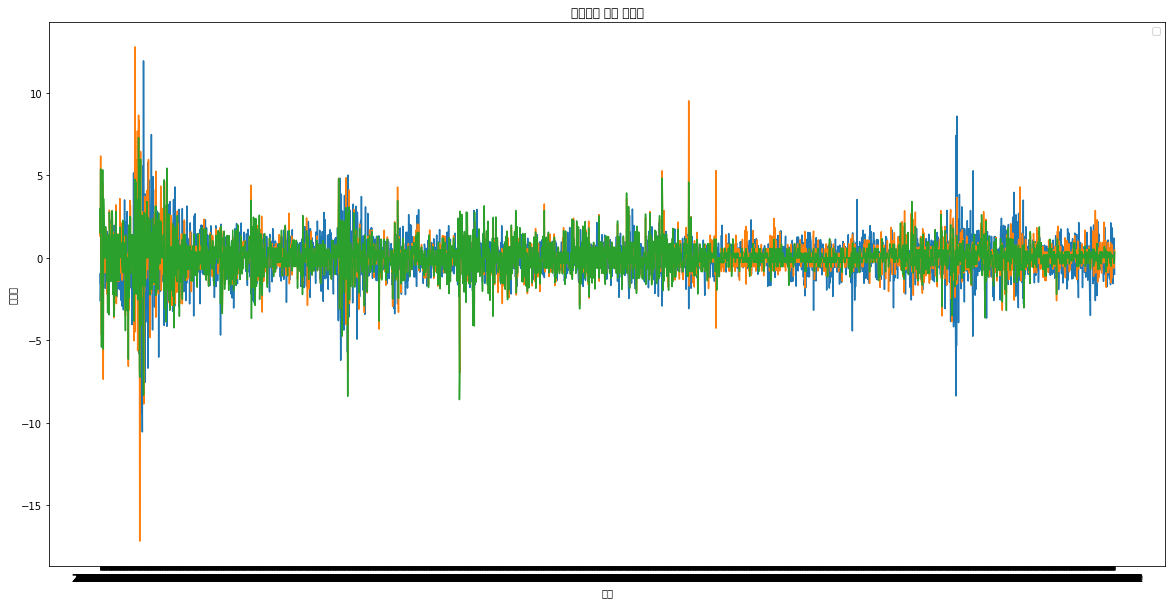

In [144]:
#그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(gnk6['날짜'], gnk6['변동 %']) 
plt.plot(gnk6['날짜'], gnk6['금구매변동%'])
plt.plot(gnk6['날짜'], gnk6['금판매변동%'])
plt.title('코스피와 금값 변동량') 
plt.xlabel("날짜") 
plt.ylabel("변동량")
plt.legend()